In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Objective
Build a machine learning model to classify news articles as either real or fake using textual data.

Steps 

✅ Step 1: Install Dependencies

In [9]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk


Note: you may need to restart the kernel to use updated packages.


✅ Step 2: Load the Dataset

In [1]:
import pandas as pd

# Load both real and fake news datasets
df_fake = pd.read_csv('/kaggle/input/d/clmentbisaillon/fake-and-real-news-dataset/Fake.csv')
df_real = pd.read_csv('/kaggle/input/d/clmentbisaillon/fake-and-real-news-dataset/True.csv')

# Add labels
df_fake['label'] = 0  # Fake
df_real['label'] = 1  # Real

# Combine the datasets
df = pd.concat([df_fake, df_real], axis=0).reset_index(drop=True)


✅ Step 3: Preprocess the Data

In [2]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords

# Drop unnecessary columns
df = df[['title', 'text', 'label']]

# Fill any missing values
df.fillna('', inplace=True)

# Combine title and text
df['content'] = df['title'] + ' ' + df['text']

# Split the data
X = df['content']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Convert text to numerical vectors
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Step 4: Build and Train the Model

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Model training
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9856347438752784
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.98      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Visualize Word Frequencies

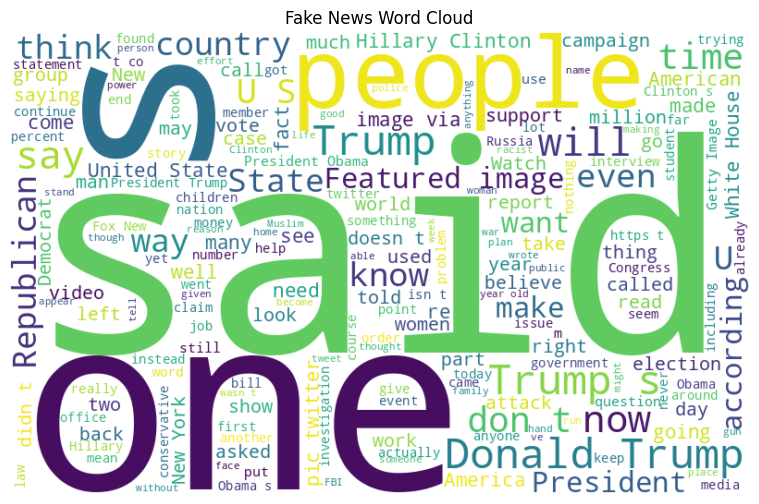

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for Fake News
fake_text = " ".join(df_fake['text'])
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(fake_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News Word Cloud")
plt.show()
